# 1 - Libraries and Data Reading

In [1]:
# Manipulation
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Training and classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv("/kaggle/input/adult-pmr3508/train_data.csv",sep=r'\s*,\s*',engine='python',na_values="?")
df_test = pd.read_csv("/kaggle/input/adult-pmr3508/test_data.csv",sep=r'\s*,\s*',engine='python',na_values="?")

In [3]:
df_train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


# 2 - Exploratory Analysis

## A First Analysis

In [4]:
df_train.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print(df_train.info(), "\n")
null_columns = df_train.columns[df_train.isnull().any()]
null_counts = df_train[null_columns].isnull().sum()
print("\033[91mMissing values no dataset de treino:\033[0m")
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB
None 

Missing values no dataset de treino:
workc

In [6]:
null_columns = df_test.columns[df_test.isnull().any()]
null_counts = df_test[null_columns].isnull().sum()
print("\033[91mMissing values no dataset de teste:\033[0m")
print(null_counts)

Missing values no dataset de teste:
workclass         963
occupation        966
native.country    274
dtype: int64


## Directed Analysis

**These are some questions we can ask the dataset in order to better understand it:**  
- a - Is the number of people that the census represents per data point (fnlwgt) smaller if the individual makes more than 50k a year?
- b - What is the profile of those who earn more than 50k? (education X occupation X workclass)
- c - Are the features marital.status and relationship redundant?
- d - How does education relate to hours worked per week? For those who work, does studying more imply working less?

### a - Representation of the richest

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


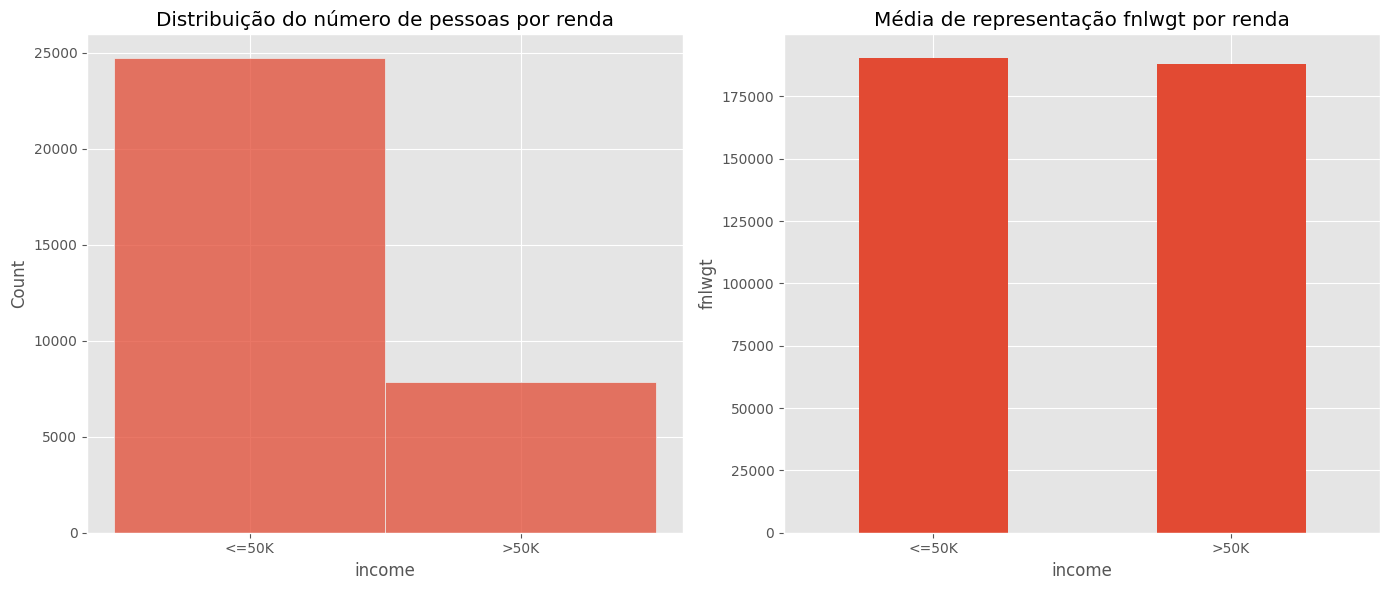

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 'income' distribution
sns.histplot(df_train['income'], kde=False, ax=ax[0])
ax[0].set_title('Distribuição do número de pessoas por renda')

# mean 'fnlwgt' by 'income'
df_train.groupby('income')['fnlwgt'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('Média de representação fnlwgt por renda')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
ax[1].set_ylabel('fnlwgt')

plt.tight_layout()
plt.show()

Although those who earn more than 50K are fewer in number, the average representation is similar to those who earn less.

### b - Profile by tracing some features

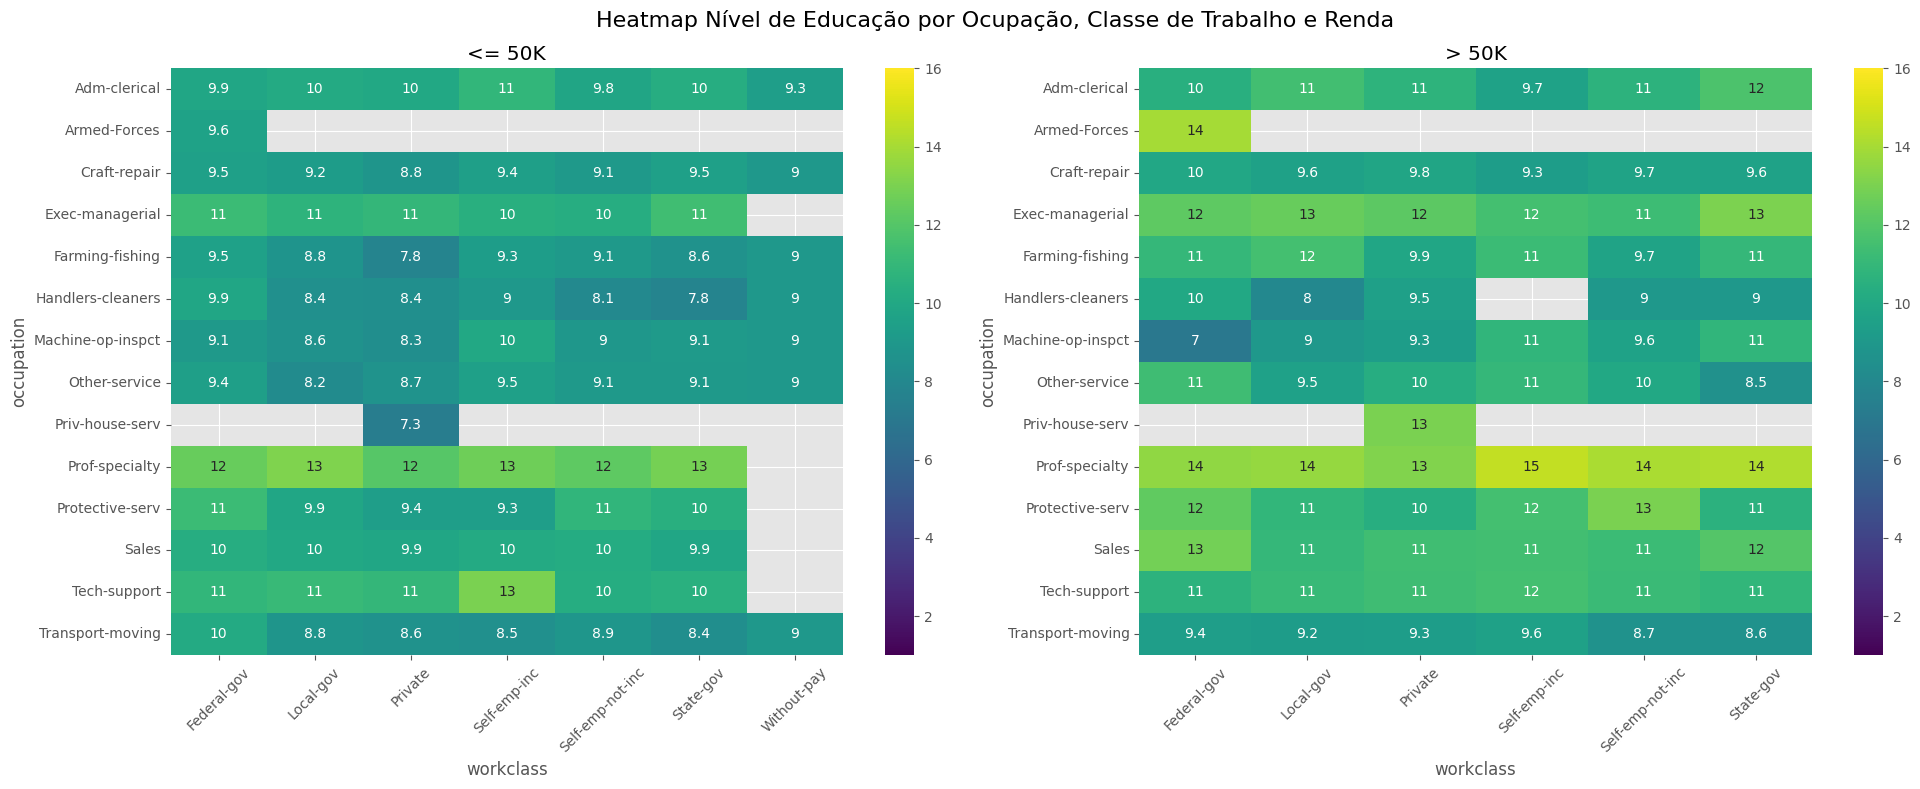

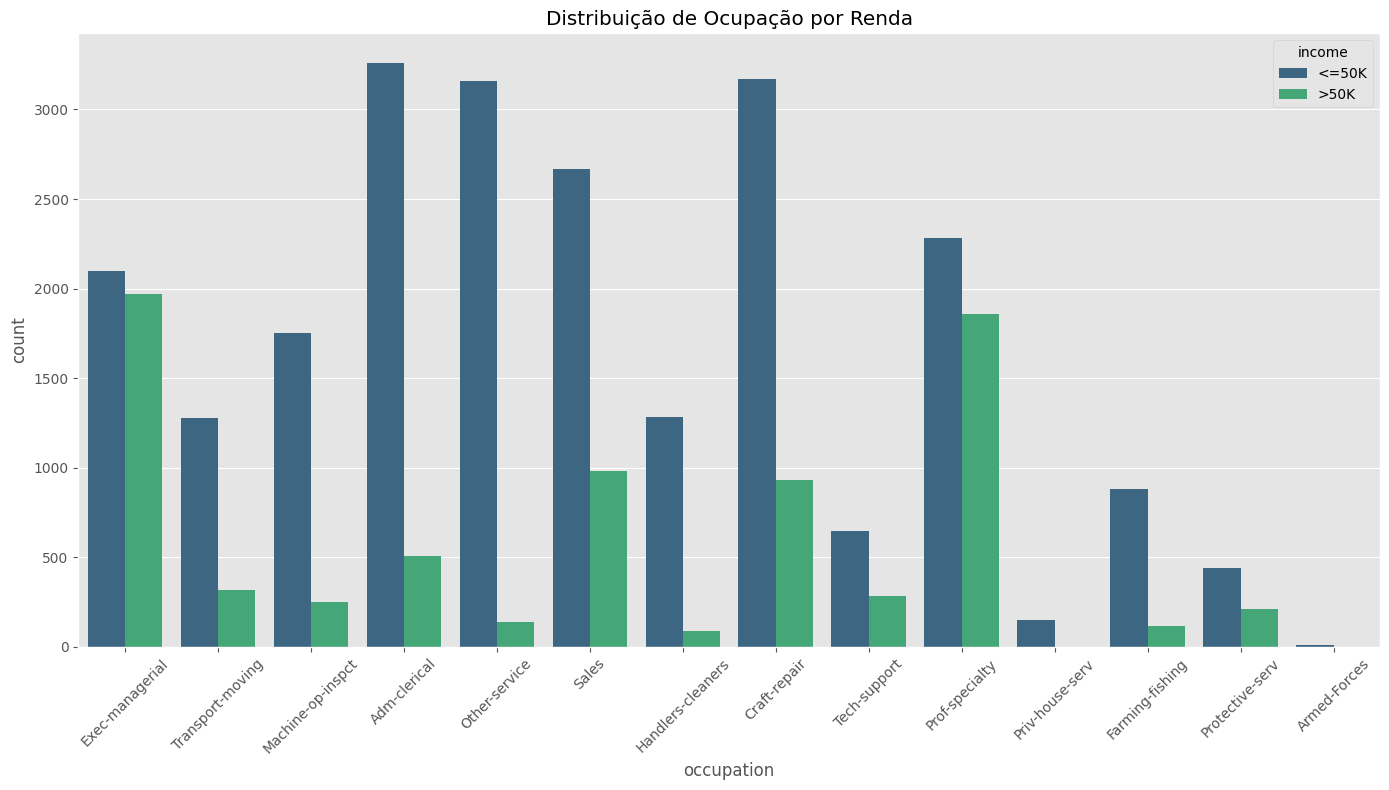

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# min and max values for the scale
vmin = df_train['education.num'].min()
vmax = df_train['education.num'].max()

# Heatmap for income <= 50K
pivot_table_50K = df_train[df_train['income'] == '<=50K'].pivot_table(values='education.num', index=['occupation'], columns=['workclass'], aggfunc='mean')
sns.heatmap(pivot_table_50K, annot=True, cmap='viridis', ax=ax[0], vmin=vmin, vmax=vmax)
ax[0].set_title('<= 50K')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

# Heatmap for income > 50K
pivot_table_50K_plus = df_train[df_train['income'] == '>50K'].pivot_table(values='education.num', index=['occupation'], columns=['workclass'], aggfunc='mean')
sns.heatmap(pivot_table_50K_plus, annot=True, cmap='viridis', ax=ax[1], vmin=vmin, vmax=vmax)
ax[1].set_title('> 50K')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

fig.suptitle('Heatmap Nível de Educação por Ocupação, Classe de Trabalho e Renda', fontsize=16)
plt.tight_layout()
plt.show()

# Distribution of 'occupation' by 'income'
plt.figure(figsize=(14, 8))
sns.countplot(data=df_train, x='occupation', hue='income', palette='viridis')

# Set the title and labels
plt.title('Distribuição de Ocupação por Renda')
plt.xlabel('occupation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
education_dict = dict(zip(df_train['education.num'],df_train['education']))
print("\033[92mLegenda para o nível de educação:\033[0m")
print(sorted(education_dict.items()))

Legenda para o nível de educação:
[(1, 'Preschool'), (2, '1st-4th'), (3, '5th-6th'), (4, '7th-8th'), (5, '9th'), (6, '10th'), (7, '11th'), (8, '12th'), (9, 'HS-grad'), (10, 'Some-college'), (11, 'Assoc-voc'), (12, 'Assoc-acdm'), (13, 'Bachelors'), (14, 'Masters'), (15, 'Prof-school'), (16, 'Doctorate')]


Some points can be raised from this:
- In general, the level of education implies higher income
- Armed-Forces and Priv-house-serv are the ones who benefit the most from this, although they are very few
- As expected, Prof-specialty who go beyond a bachelor's degree are eligible for better-paying positions in all classes
- Exec-managerial also shows this behavior when reaching a bachelor's degree
- It indicates that people who choose these two occupations have a higher probability of earning >50K compared to other occupations

### c - marital X relationship

In [10]:
df_train.groupby(['marital.status','relationship']).size().reset_index(name='count')

,marital.status,relationship,count
0,Divorced,Not-in-family,2404
1,Divorced,Other-relative,110
2,Divorced,Own-child,328
3,Divorced,Unmarried,1601
4,Married-AF-spouse,Husband,9
5,Married-AF-spouse,Other-relative,1
6,Married-AF-spouse,Own-child,1
7,Married-AF-spouse,Wife,12
8,Married-civ-spouse,Husband,13184
9,Married-civ-spouse,Not-in-family,17


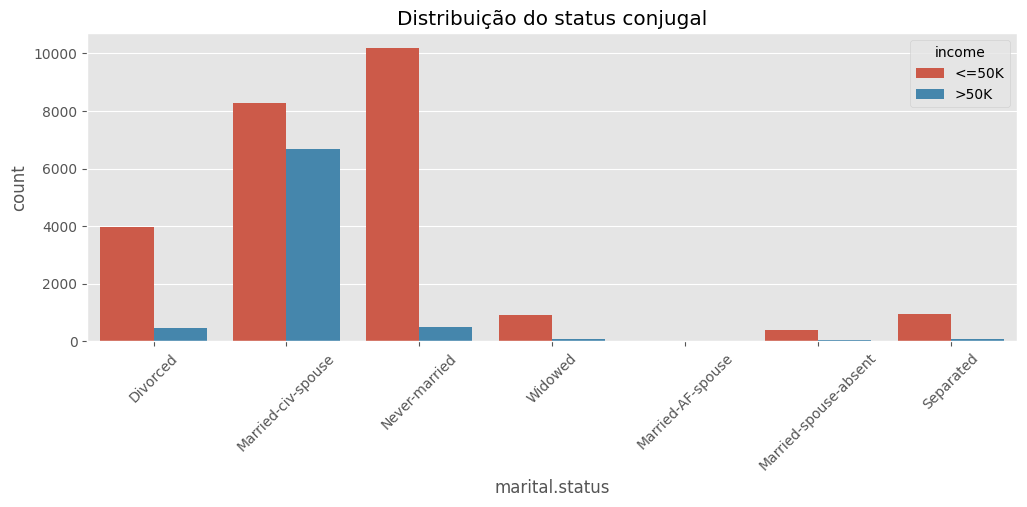

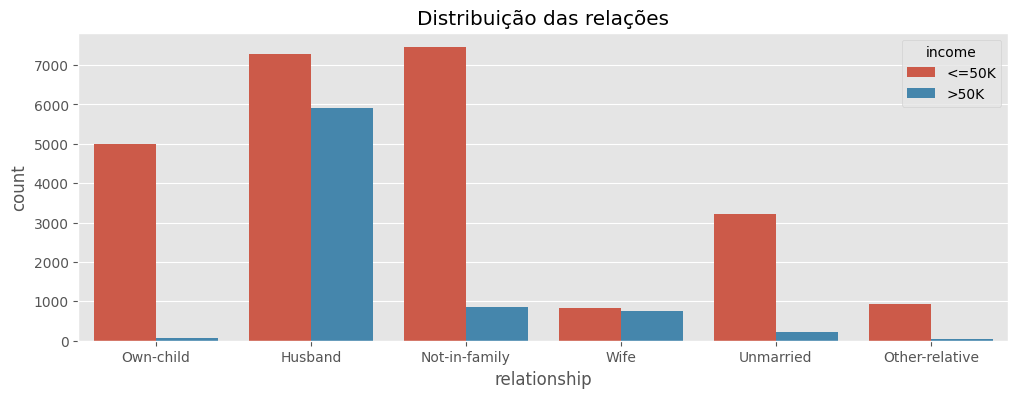

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x='marital.status', data=df_train, hue='income')
plt.xticks(rotation = 45)
plt.title('Distribuição do status conjugal')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='relationship', data=df_train, hue='income')
plt.title('Distribuição das relações')
plt.show()

Relevant points:
- The fact that a person is married or not, according to the graphs, is the main factor impacting income
- According to the table, among Married-AF-spouse and Married-civ-spouse, the proportion of those considered 'Husband' or 'Wife' is much higher than other types of relationships, indicating another redundancy

### d - education X hours.per.week

In [12]:
df_train[~df_train['workclass'].isin(['Never-worked','Without-pay'])].groupby(['education.num','education'])['hours.per.week'].mean().sort_values(ascending=False)

education.num  education   
15             Prof-school     47.425347
16             Doctorate       46.973366
14             Masters         43.836332
13             Bachelors       42.614494
11             Assoc-voc       41.610709
9              HS-grad         40.586217
12             Assoc-acdm      40.495310
4              7th-8th         39.357143
3              5th-6th         38.897898
10             Some-college    38.858358
2              1st-4th         38.255952
5              9th             38.044747
6              10th            37.056928
1              Preschool       36.647059
8              12th            35.780600
7              11th            33.946337
Name: hours.per.week, dtype: float64

In general, the higher the individual's level of education, the more they seem willing to work

## Analysis of numerical variables

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

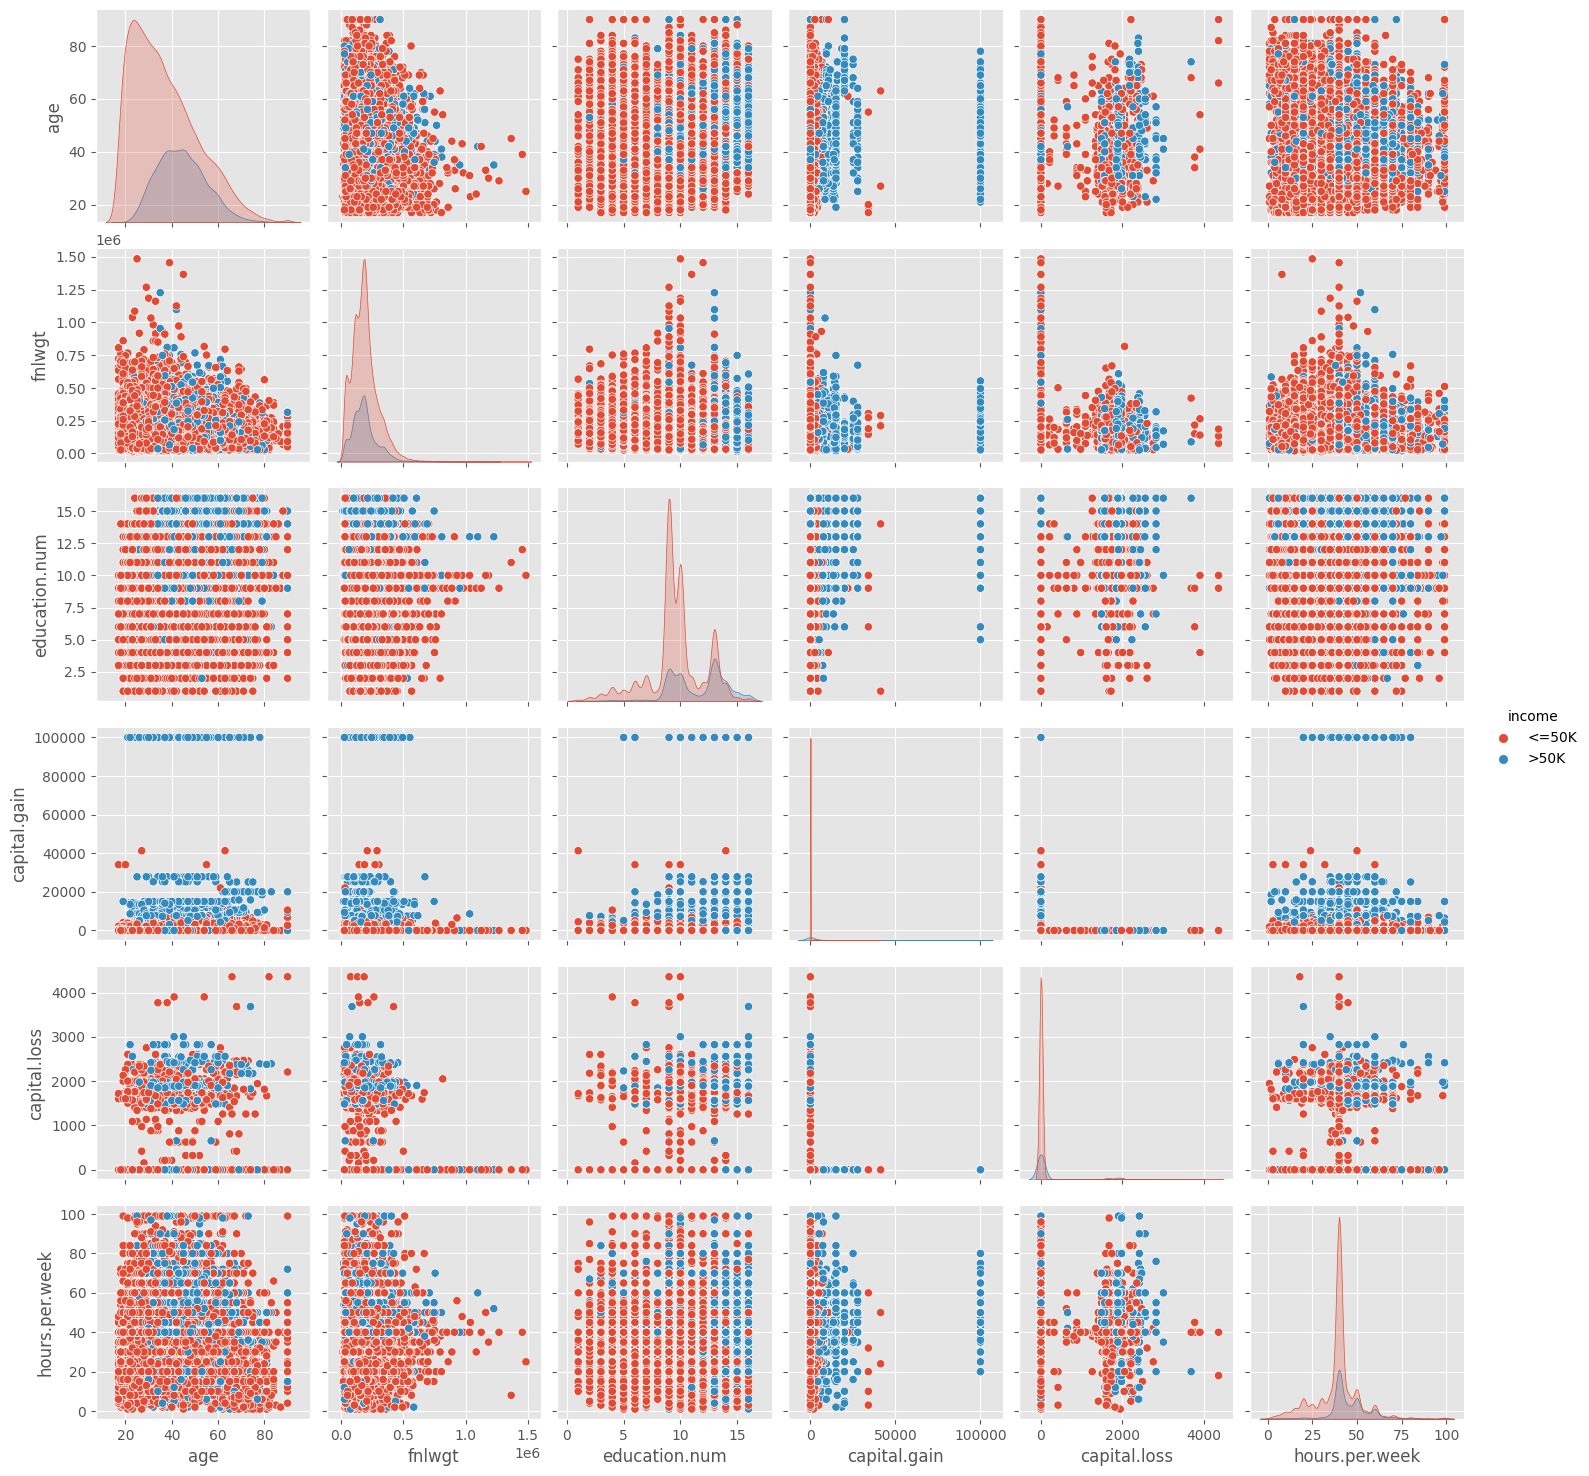

In [13]:
sns.pairplot(df_train.drop('Id',axis=1), hue="income")

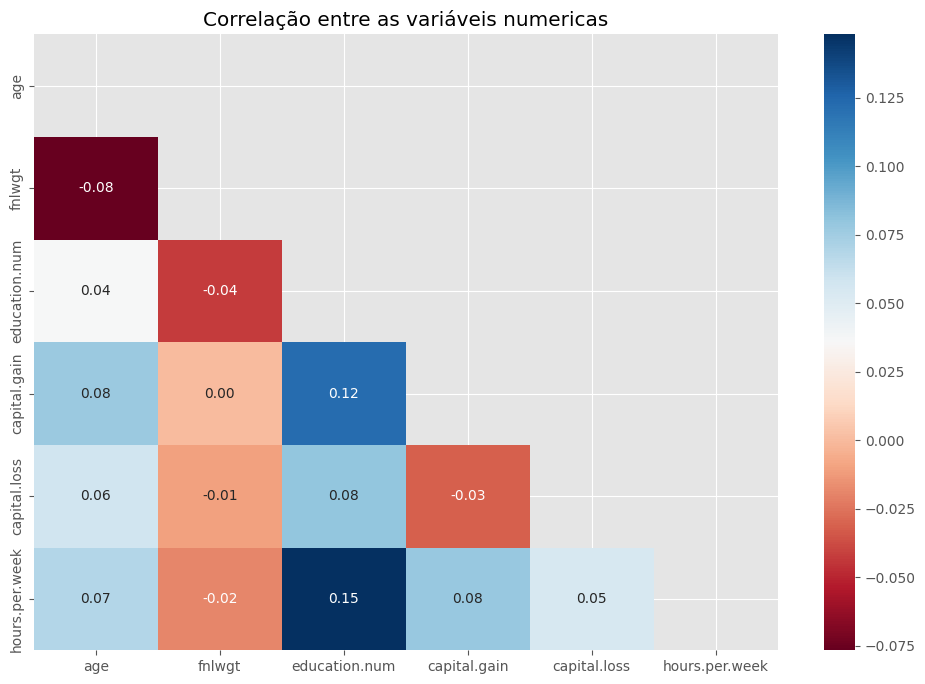

In [14]:
numerical_columns = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
corr = df_train[numerical_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(corr)))
plt.title("Correlação entre as variáveis numericas")
plt.show()

Does not present a relevant degree of correlation

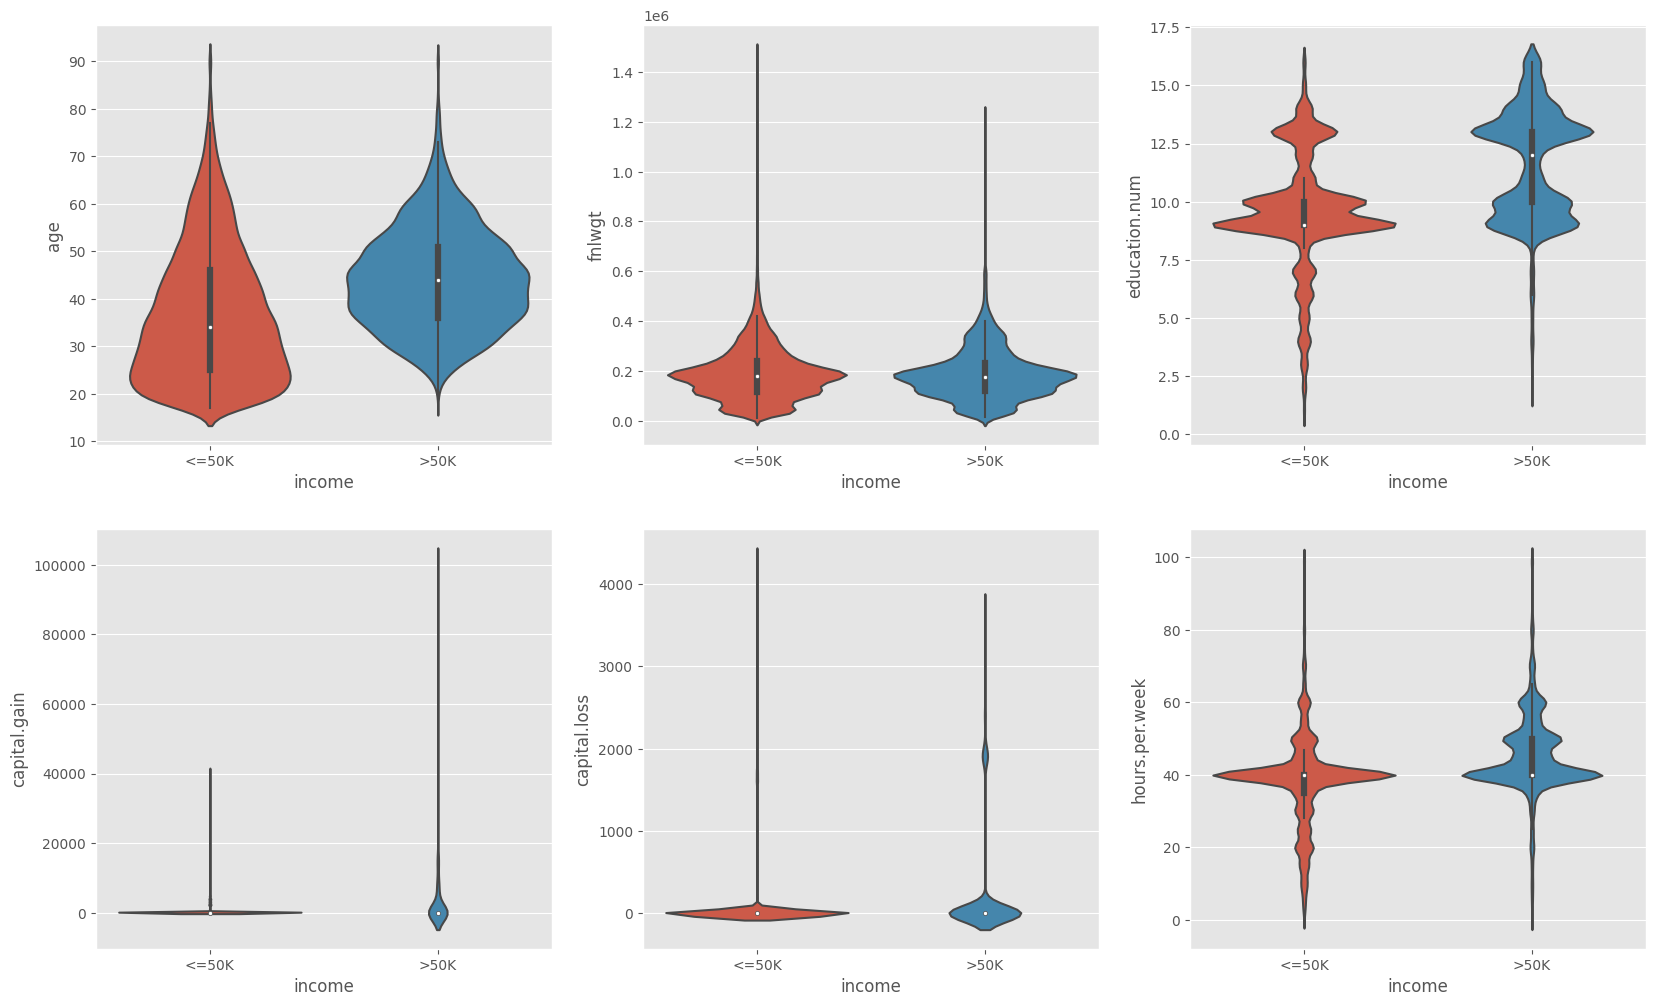

In [15]:
numerical_columns = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
fig, eixo = plt.subplots(2,3,figsize=(20,12))
for i in range(2*3):
    sns.violinplot(data=df_train,x='income',y=numerical_columns[i],ax=eixo[i//3][i%3])

In [16]:
capital_moviment_size = df_train[(df_train['capital.gain'] != 0) | (df_train['capital.loss'] != 0)].shape[0]
total_size = df_train.shape[0]

percentage = capital_moviment_size / total_size * 100
print(f"{percentage:.2f}% das pessoas tem alguma mudança no capital")

12.99% das pessoas tem alguma mudança no capital


Capital gains and losses seem to contain outliers, suggesting appropriate normalization for these data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

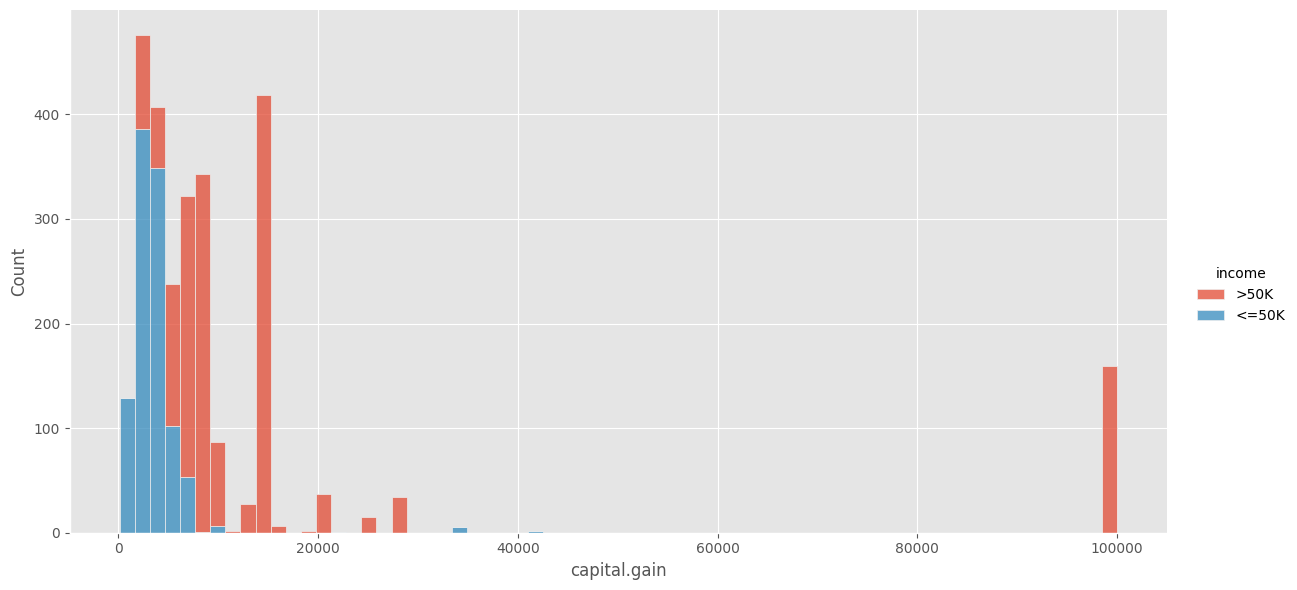

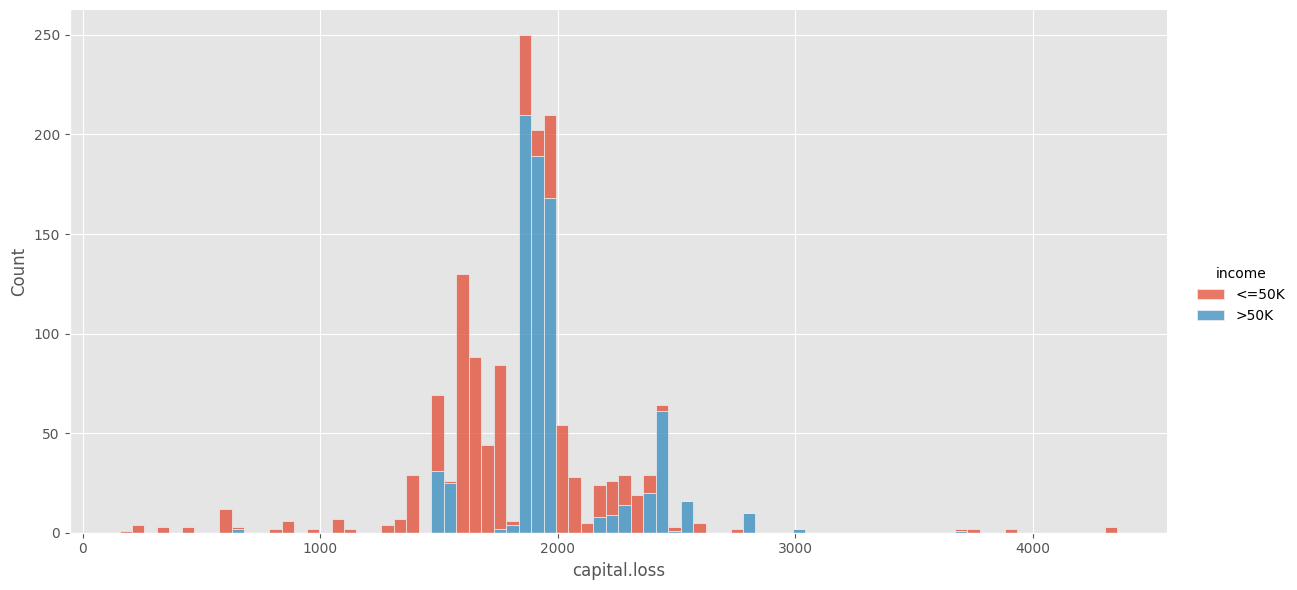

In [17]:
sns.displot(df_train[(df_train['capital.gain'] != 0)], x='capital.gain', hue='income', multiple='stack', kde=False, height=6, aspect=2)
sns.displot(df_train[(df_train['capital.loss'] != 0)], x='capital.loss', hue='income', multiple='stack', kde=False, height=6, aspect=2)

The histogram of capital gain and loss corroborates the importance they can bring to the dataset

## Analysis of categorical variables

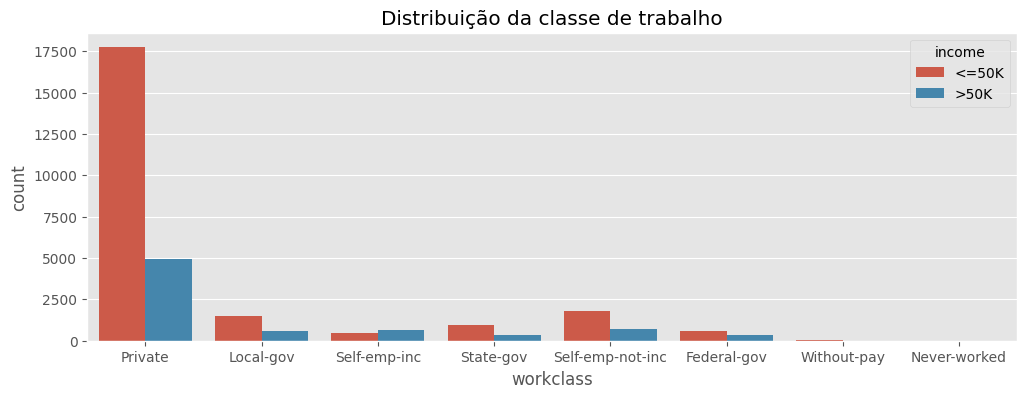

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(x='workclass', data=df_train, hue='income')
plt.title('Distribuição da classe de trabalho')
plt.show()

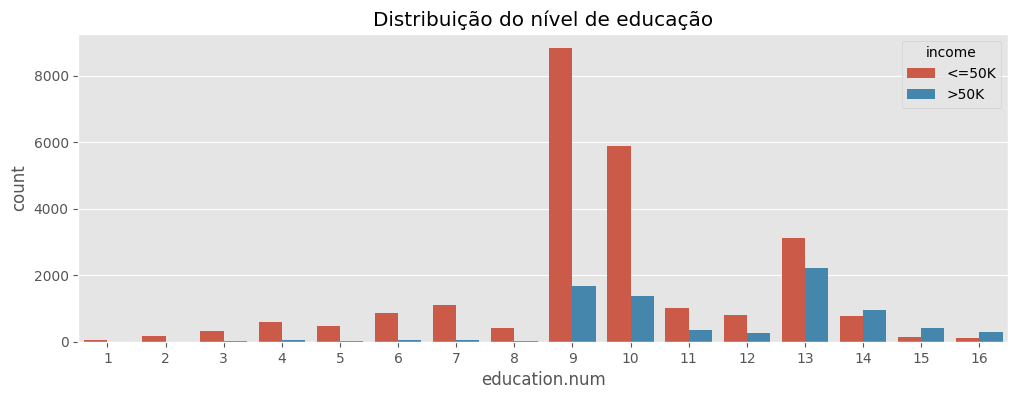

[(1, 'Preschool'), (2, '1st-4th'), (3, '5th-6th'), (4, '7th-8th'), (5, '9th'), (6, '10th'), (7, '11th'), (8, '12th'), (9, 'HS-grad'), (10, 'Some-college'), (11, 'Assoc-voc'), (12, 'Assoc-acdm'), (13, 'Bachelors'), (14, 'Masters'), (15, 'Prof-school'), (16, 'Doctorate')]


In [19]:
plt.figure(figsize=(12,4))
sns.countplot(x='education.num', data=df_train, hue='income')
plt.title('Distribuição do nível de educação')
plt.show()
education_dict = dict(zip(df_train['education.num'],df_train['education']))
print(sorted(education_dict.items()))

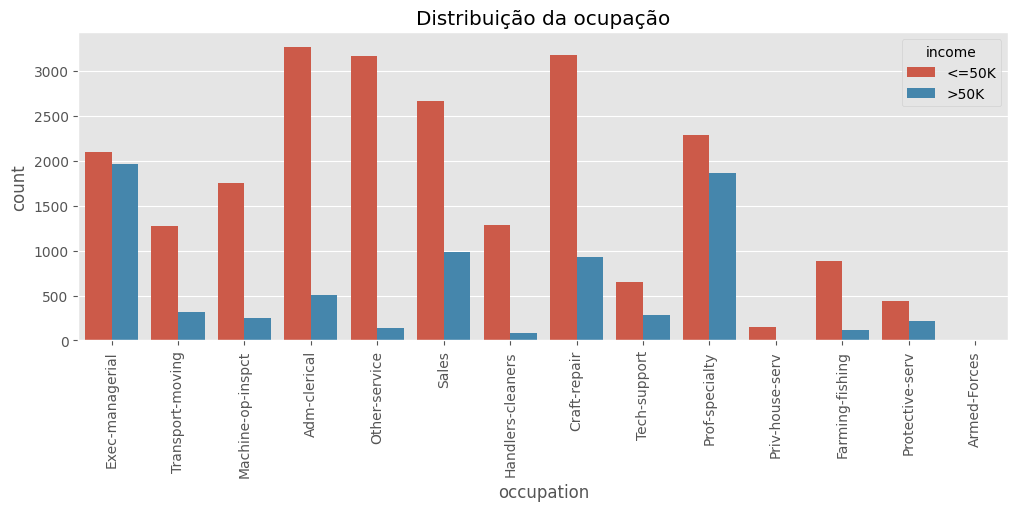

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x='occupation', data=df_train, hue='income')
plt.xticks(rotation = 90)
plt.title('Distribuição da ocupação')
plt.show()

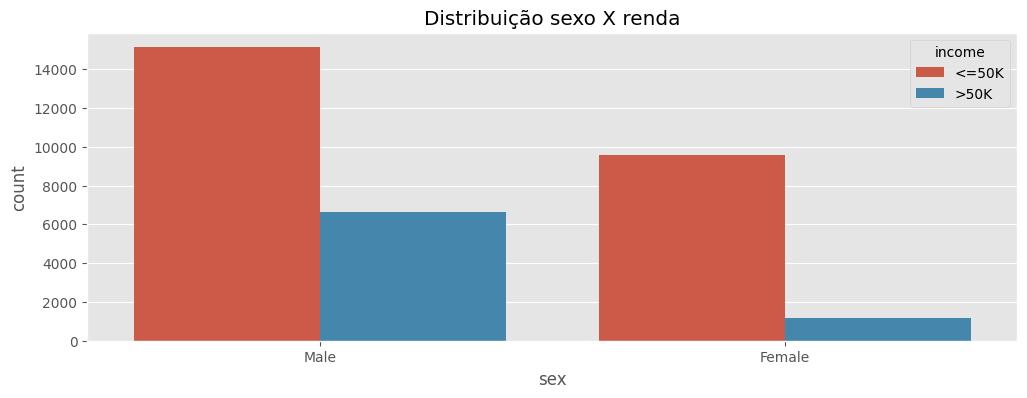

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='sex', data=df_train, hue='income')
plt.title('Distribuição sexo X renda')
plt.show()

In [22]:
totalF = df_train[df_train['sex'] == 'Female'].shape[0]
greaterF = df_train[(df_train['sex'] == 'Female') & (df_train['income'] == '>50K')].shape[0]
print(f'Mulheres que ganham >50K: {100*greaterF/totalF:.2f}%')

totalM = df_train[df_train['sex'] == 'Male'].shape[0]
greaterM = df_train[(df_train['sex'] == 'Male') & (df_train['income'] == '>50K')].shape[0]
print(f'Homens que ganham >50K:   {100*greaterM/totalM:.2f}%')

Mulheres que ganham >50K: 10.95%
Homens que ganham >50K:   30.58%


The percentage of women with high income relative to their total is much lower than that of men, revealing a bias behind it

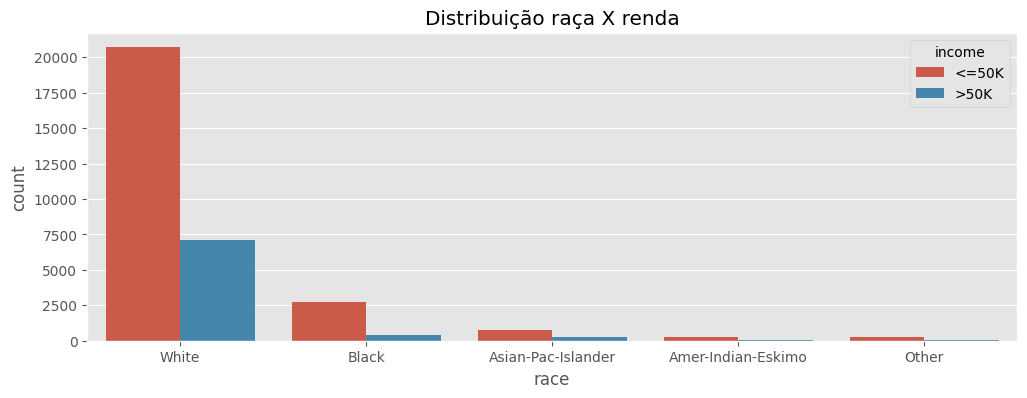

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x='race', data=df_train, hue='income')
plt.title('Distribuição raça X renda')
plt.show()

In [24]:
print("\033[91mPorcentagem daqueles que ganham >50K na sua categoria:\033[0m")

totalW = df_train[df_train['race'] == 'White'].shape[0]
greaterW = df_train[(df_train['race'] == 'White') & (df_train['income'] == '>50K')].shape[0]
print(f'White               {100*greaterW/totalW:.2f}%')

totalB = df_train[df_train['race'] == 'Black'].shape[0]
greaterB = df_train[(df_train['race'] == 'Black') & (df_train['income'] == '>50K')].shape[0]
print(f'Black               {100*greaterB/totalB:.2f}%')

totalA = df_train[df_train['race'] == 'Asian-Pac-Islander'].shape[0]
greaterA = df_train[(df_train['race'] == 'Asian-Pac-Islander') & (df_train['income'] == '>50K')].shape[0]
print(f'Asian-Pac-Islander  {100*greaterA/totalA:.2f}%')

totalI = df_train[df_train['race'] == 'Amer-Indian-Eskimo'].shape[0]
greaterI = df_train[(df_train['race'] == 'Amer-Indian-Eskimo') & (df_train['income'] == '>50K')].shape[0]
print(f'Amer-Indian-Eskimo  {100*greaterI/totalI:.2f}%')

totalO = df_train[df_train['race'] == 'Other'].shape[0]
greaterOI = df_train[(df_train['race'] == 'Other') & (df_train['income'] == '>50K')].shape[0]
print(f'Other               {100*greaterI/totalI:.2f}%')

Porcentagem daqueles que ganham >50K na sua categoria:
White               25.59%
Black               12.39%
Asian-Pac-Islander  26.56%
Amer-Indian-Eskimo  11.58%
Other               11.58%


Despite other races being poorly distributed compared to White, it is also possible to infer a bias

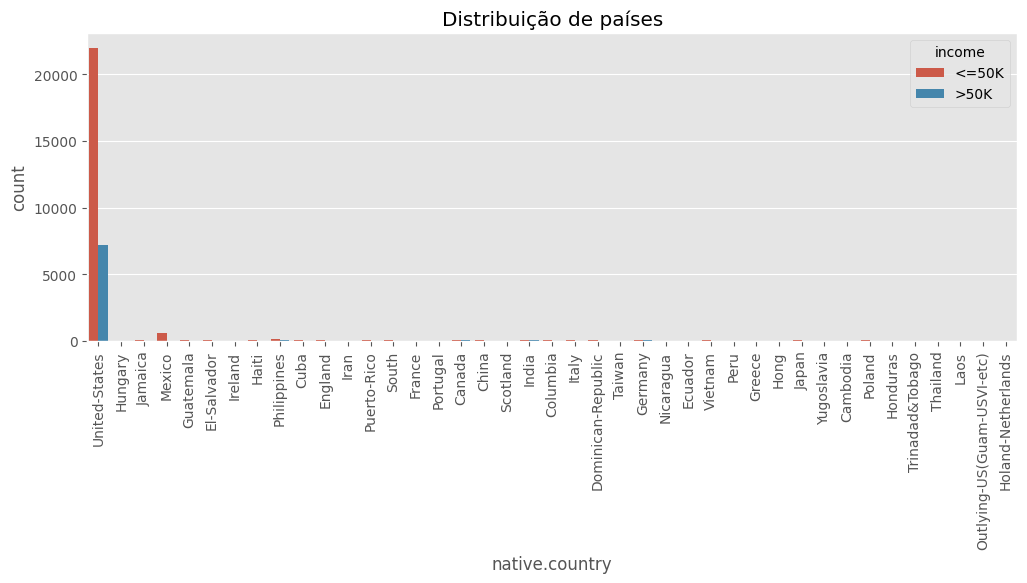

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x='native.country', data=df_train, hue='income')
plt.title('Distribuição de países')
plt.xticks(rotation = 90)
plt.show()

Most of the data is about people native to the USA

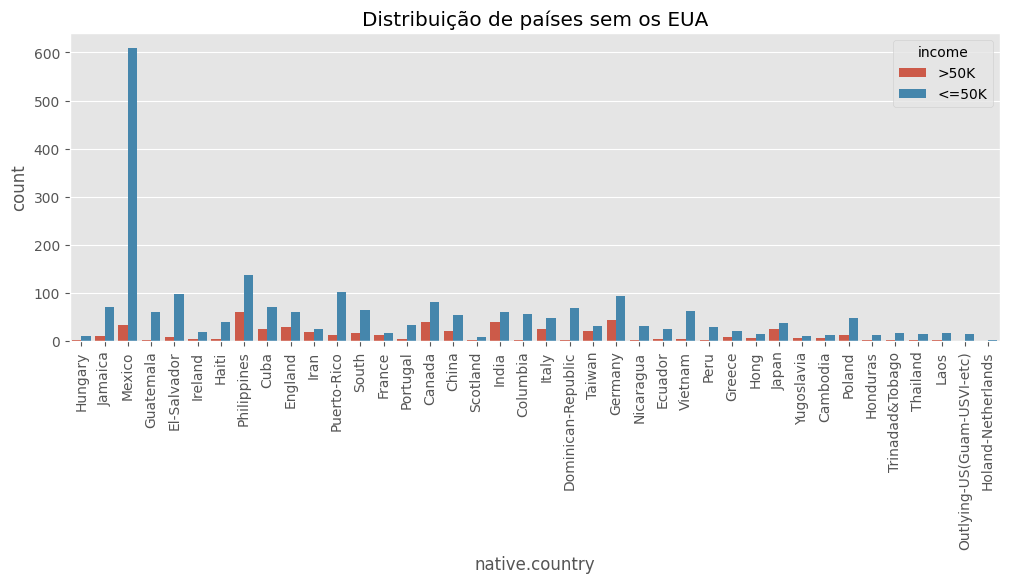

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='native.country', data=df_train[df_train['native.country'] != 'United-States'], hue='income')
plt.title('Distribuição de países sem os EUA')
plt.xticks(rotation = 90)
plt.show()

The countries that stand out the most are Mexico and the USA. The others can be categorized into another category.

# 3 - Preparation and Cleaning

## Removal of variables

Removing redundant features

In [27]:
X_train = df_train.drop(['Id','education','relationship'],axis=1)
X_test = df_test.drop(['Id','education','relationship'],axis=1)
ids = df_test['Id']

## Handling missing values

In [28]:
# Encode categorical variables
missing_columns = ['occupation', 'workclass', 'native.country']
encoder = OrdinalEncoder()
X_train[missing_columns] = encoder.fit_transform(X_train[missing_columns])
X_test[missing_columns] = encoder.transform(X_test[missing_columns])

# Find the nearest neighbors and impute the missing values
imputer = KNNImputer(n_neighbors=5)
X_train[missing_columns] = imputer.fit_transform(X_train[missing_columns])
X_test[missing_columns] = imputer.transform(X_test[missing_columns])

# Decode categorical variables back to original categories
X_train[missing_columns] = encoder.inverse_transform(X_train[missing_columns])
X_test[missing_columns] = encoder.inverse_transform(X_test[missing_columns])

# Verify the imputation
print(X_train[missing_columns].isnull().sum())
print(X_test[missing_columns].isnull().sum())

occupation        0
workclass         0
native.country    0
dtype: int64
occupation        0
workclass         0
native.country    0
dtype: int64


## Encoding in categorical variables

Dimensionality reduction as presented in the analysis

In [29]:
casados = ['Married-civ-spouse', 'Married-AF-spouse']

X_train['marital.status'] = np.where(X_train['marital.status'].isin(casados), 1, 0)
X_test['marital.status'] = np.where(X_test['marital.status'].isin(casados), 1, 0)

In [30]:
countries = ['United-States','Mexico']

X_train['native.country'] = np.where(~X_train['native.country'].isin(countries), 'Other', X_train['native.country'])
X_test['native.country'] = np.where(~X_test['native.country'].isin(countries), 'Other', X_test['native.country'])

Normalization of data with z-score

In [31]:
to_scale_standard = ['age', 'fnlwgt', 'education.num','hours.per.week','capital.gain','capital.loss']
X_train[to_scale_standard] = StandardScaler().fit_transform(X_train[to_scale_standard])
X_test[to_scale_standard] = StandardScaler().fit_transform(X_test[to_scale_standard])

Applying one-hot encoding to the remaining categorical variables

In [32]:
X_train['income'] = np.where(X_train['income'] == '>50K', 1, 0)
X_train['sex'] = LabelEncoder().fit_transform(X_train['sex'].astype(str))
X_test['sex'] = LabelEncoder().fit_transform(X_test['sex'].astype(str))

categorical_cols = ['workclass', 'occupation', 'native.country', 'race']
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           32560 non-null  float64
 1   fnlwgt                        32560 non-null  float64
 2   education.num                 32560 non-null  float64
 3   marital.status                32560 non-null  int64  
 4   sex                           32560 non-null  int64  
 5   capital.gain                  32560 non-null  float64
 6   capital.loss                  32560 non-null  float64
 7   hours.per.week                32560 non-null  float64
 8   income                        32560 non-null  int64  
 9   workclass_Federal-gov         32560 non-null  bool   
 10  workclass_Local-gov           32560 non-null  bool   
 11  workclass_Never-worked        32560 non-null  bool   
 12  workclass_Private             32560 non-null  bool   
 13  w

# 4 - Modeling

## Separation of data into target and input

In [34]:
y_train = X_train['income']
X_train = X_train.drop('income',axis=1)

## Finding hyperparameter

Search for the parameter k in the range [5,30] in steps of 5 that obtains the best accuracy when performing cross-validation

In [35]:
knn = KNeighborsClassifier()
neighbors_range = dict(n_neighbors=np.arange(15,41,5))
grid = GridSearchCV(estimator=knn, param_grid=neighbors_range, cv=5, scoring='accuracy', return_train_score=True,verbose=1)
grid_search=grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [36]:
print('Melhor parâmetro:',grid_search.best_params_['n_neighbors'])
print(f'Acurácia sobre o dataset de treino: {grid_search.best_score_*100:.2f}%')

Melhor parâmetro: 35
Acurácia sobre o dataset de treino: 84.48%


Search for k from 1 to 1 starting from the found parameter up to the next multiple of 5

In [37]:
begin_range = grid_search.best_params_['n_neighbors']
end_range = begin_range + begin_range % 5 - 1

if begin_range%5 != 0 and end_range > begin_range:
    knn = KNeighborsClassifier()
    neighbors_range = dict(n_neighbors=np.arange(begin_range,end_range,1))
    grid = GridSearchCV(estimator=knn, param_grid=neighbors_range, cv=5, scoring='accuracy', return_train_score=True,verbose=1)
    grid_search=grid.fit(X_train, y_train.values.ravel())

In [38]:
print('Melhor parâmetro:',grid_search.best_params_['n_neighbors'])
print(f'Acurácia sobre o dataset de treino: {grid_search.best_score_*100:.2f}%')

Melhor parâmetro: 35
Acurácia sobre o dataset de treino: 84.48%


## Calculating accuracy

In [39]:
# setup
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=575)
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)

# training
knn.fit(train_X,train_y)

# predicting and scoring
pred_y = knn.predict(val_X)
acc = accuracy_score(val_y,pred_y)*100
print(f'Acurácia: {acc:.2f}%')
print(f'Erro empírico: {100-acc:.2f}%')
print()
print(f'Precisão: {precision_score(val_y,pred_y)*100:.2f}%')
print(f'Recall: {recall_score(val_y,pred_y)*100:.2f}%')
print(f'F1: {f1_score(val_y,pred_y)*100:.2f}%')

Acurácia: 83.91%
Erro empírico: 16.09%

Precisão: 71.58%
Recall: 54.64%
F1: 61.97%


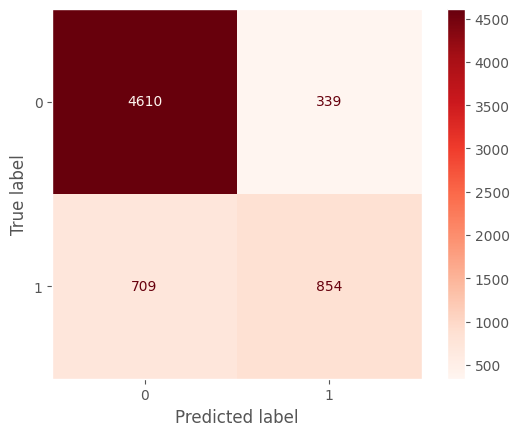

In [40]:
conf_matrix = confusion_matrix(val_y,pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap='Reds')
plt.grid(False)
plt.show()

## Results

In [41]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred = np.where(y_pred == 1, '>50K', '<=50K')
df_result = pd.DataFrame(({'Id':ids, 'income':y_pred}))
df_result.head()

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K


In [42]:
df_result.to_csv("submission.csv",index=False) #salvar em arquivo .csv